In [2]:
print("hello world")

hello world


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("datascience_salaries.csv")

In [5]:
df

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000
...,...,...,...,...,...,...,...
1166,2243,ML Ops,Full Time,Senior,Toronto,USD,228000
1167,2249,ML Ops,Full Time,Senior,Boston,USD,115000
1168,2250,ML Ops,Full Time,Senior,Delhi,USD,76000
1169,2255,ML Ops,Full Time,Senior,San Francisco,USD,68000


In [6]:
df['experience_level'].value_counts()

experience_level
Senior       727
Mid          305
Entry        126
Executive     13
Name: count, dtype: int64

In [7]:
df['job_title'].value_counts()

job_title
Data scientist      394
Data analyst        368
Machine learning    289
Big data            101
ML Ops               19
Name: count, dtype: int64

In [8]:
df['job_type'].value_counts()

job_type
Full Time     1136
Internship      35
Name: count, dtype: int64

In [9]:
df['salary'].value_counts()

salary
68000     219
63000     165
51000     112
30000     106
45000      96
         ... 
57000       1
96000       1
160000      1
109000      1
147000      1
Name: count, Length: 87, dtype: int64

In [10]:
df['salary_currency'].value_counts()

salary_currency
USD    1157
EUR       9
GBP       5
Name: count, dtype: int64

In [11]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
0       1
1208    1
1226    1
1225    1
1224    1
       ..
491     1
490     1
489     1
484     1
2259    1
Name: count, Length: 1171, dtype: int64

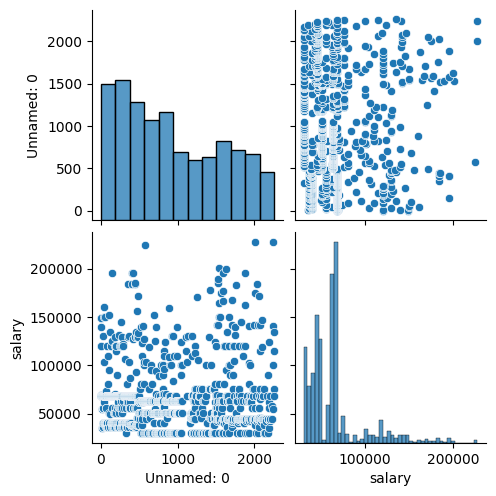

In [12]:
sns.pairplot(data = df)

In [13]:
df.dtypes

Unnamed: 0           int64
job_title           object
job_type            object
experience_level    object
location            object
salary_currency     object
salary               int64
dtype: object

In [14]:
df.isnull().sum()

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['Unnamed: 0', 'job_title', 'job_type', 'experience_level', 'location',
       'salary_currency', 'salary'],
      dtype='object')

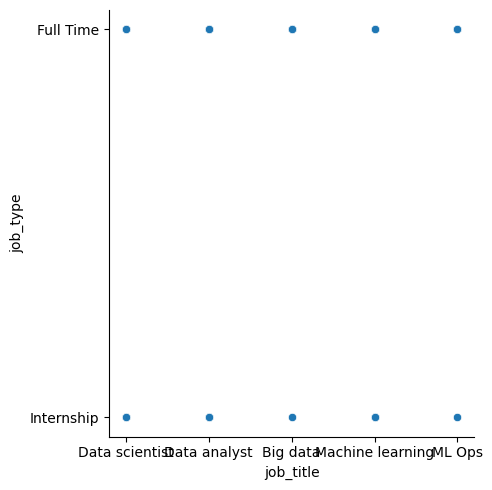

In [17]:
sns.relplot(x = "job_title" , y="job_type" , data = df)

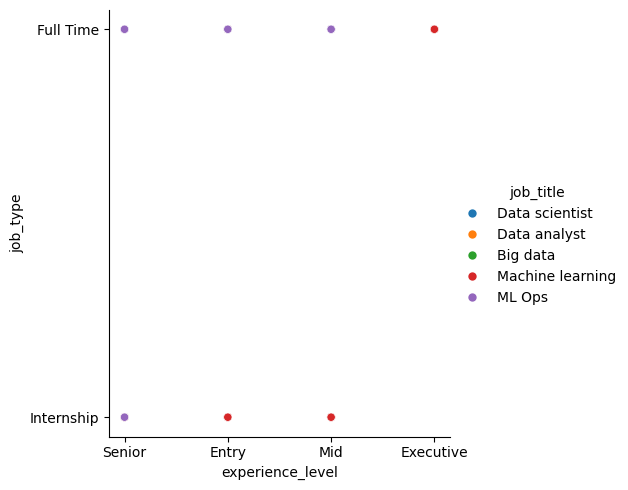

In [18]:
sns.relplot(x = "experience_level" , y = "job_type" , data = df , hue = "job_title")

In [19]:
cat_col = df.select_dtypes(include = "O")
num_col = df.select_dtypes(exclude = "O")

In [20]:
cat_col

,job_title,job_type,experience_level,location,salary_currency
0,Data scientist,Full Time,Senior,New York City,USD
1,Data scientist,Full Time,Senior,Boston,USD
2,Data scientist,Full Time,Senior,London,USD
3,Data scientist,Full Time,Senior,Boston,USD
4,Data scientist,Full Time,Senior,New York City,USD
...,...,...,...,...,...
1166,ML Ops,Full Time,Senior,Toronto,USD
1167,ML Ops,Full Time,Senior,Boston,USD
1168,ML Ops,Full Time,Senior,Delhi,USD
1169,ML Ops,Full Time,Senior,San Francisco,USD


In [21]:
num_col

,Unnamed: 0,salary
0,0,149000
1,2,120000
2,3,68000
3,4,120000
4,5,149000
...,...,...
1166,2243,228000
1167,2249,115000
1168,2250,76000
1169,2255,68000


In [22]:
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder,OneHotEncoder

In [23]:
encoder = OrdinalEncoder()

In [24]:
encoder.fit(cat_col)

OrdinalEncoder()

In [25]:
transform_df = encoder.transform(cat_col)

In [26]:
transform_df

array([[  2.,   0.,   3., 179.,   2.],
       [  2.,   0.,   3.,  34.,   2.],
       [  2.,   0.,   3., 136.,   2.],
       ...,
       [  3.,   0.,   3.,  76.,   2.],
       [  3.,   0.,   3., 248.,   2.],
       [  3.,   1.,   3., 179.,   2.]])

In [27]:
cat_col = pd.DataFrame(transform_df , columns = encoder.get_feature_names_out())

In [28]:
cat_col

,job_title,job_type,experience_level,location,salary_currency
0,2.0,0.0,3.0,179.0,2.0
1,2.0,0.0,3.0,34.0,2.0
2,2.0,0.0,3.0,136.0,2.0
3,2.0,0.0,3.0,34.0,2.0
4,2.0,0.0,3.0,179.0,2.0
...,...,...,...,...,...
1166,3.0,0.0,3.0,282.0,2.0
1167,3.0,0.0,3.0,34.0,2.0
1168,3.0,0.0,3.0,76.0,2.0
1169,3.0,0.0,3.0,248.0,2.0


In [29]:
final_df = pd.concat([num_col,cat_col] , axis = 1)

In [30]:
final_df

,Unnamed: 0,salary,job_title,job_type,experience_level,location,salary_currency
0,0,149000,2.0,0.0,3.0,179.0,2.0
1,2,120000,2.0,0.0,3.0,34.0,2.0
2,3,68000,2.0,0.0,3.0,136.0,2.0
3,4,120000,2.0,0.0,3.0,34.0,2.0
4,5,149000,2.0,0.0,3.0,179.0,2.0
...,...,...,...,...,...,...,...
1166,2243,228000,3.0,0.0,3.0,282.0,2.0
1167,2249,115000,3.0,0.0,3.0,34.0,2.0
1168,2250,76000,3.0,0.0,3.0,76.0,2.0
1169,2255,68000,3.0,0.0,3.0,248.0,2.0


In [31]:
x = final_df.drop("salary" , axis = 1)

In [32]:
x

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency
0,0,2.0,0.0,3.0,179.0,2.0
1,2,2.0,0.0,3.0,34.0,2.0
2,3,2.0,0.0,3.0,136.0,2.0
3,4,2.0,0.0,3.0,34.0,2.0
4,5,2.0,0.0,3.0,179.0,2.0
...,...,...,...,...,...,...
1166,2243,3.0,0.0,3.0,282.0,2.0
1167,2249,3.0,0.0,3.0,34.0,2.0
1168,2250,3.0,0.0,3.0,76.0,2.0
1169,2255,3.0,0.0,3.0,248.0,2.0


In [33]:
y = final_df[['salary']]

In [34]:
y

,salary
0,149000
1,120000
2,68000
3,120000
4,149000
...,...
1166,228000
1167,115000
1168,76000
1169,68000


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [37]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVR,SVC


In [38]:
lgr = LogisticRegression()

In [39]:
lgr.fit(x_train,y_train)

C:\Users\anshi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anshi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
print(lgr.score(x_test,y_test))

0.15319148936170213


In [41]:
lr = LinearRegression()

In [42]:
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
print(lr.score(x_test,y_test))

0.1547008431066338


In [44]:
model = DecisionTreeClassifier(criterion = "gini" , max_depth = 3 , random_state = 42)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
model2 = DecisionTreeRegressor(criterion = "squared_error" , max_depth = 3 , random_state = 42)

In [48]:
model2.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

In [50]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test,y_pred2)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
accuracy

0.5234042553191489

In [ ]:
# svmmodel = SVC(kernel = "linear" , C = 1).fit(x_train,y_train)

C:\Users\anshi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(svmmodel.score(x_test,y_test))